20932130
195065.33333333308


Text(0.5, 1.0, 'special character in title')

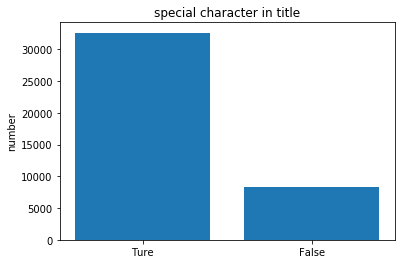

In [111]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import re

def hasNumbers(inputString):
    return bool(re.search(r'\d', inputString))
def hasSpecial(inputString):
    if all(x.isalpha() or x.isspace() or x.isnumeric() for x in inputString):
        return False
    else:
        return True

df = pd.read_csv('USvideos.csv')

df_trending = df[["trending_date"]]
df_trending_add = "20" + df_trending["trending_date"].astype(str)
df_trending_year = df_trending_add.str[0:4]
df_trending_day = df_trending_add.str[5:7]
df_trending_mon = df_trending_add.str[8:10]
df_trending_date_add = df_trending_year.astype(str)+"-" + df_trending_mon.astype(str) +"-"+ df_trending_day.astype(str)
data_trending= pd.to_datetime(df_trending_date_add) 

df_publish = df[["publish_time"]]
df_publish_sub = df_publish["publish_time"].str[0:10]
df_publish_year = df_publish_sub.str[0:4]
df_publish_day = df_publish_sub.str[8:10]
df_publish_mon = df_publish_sub.str[5:7]
df_publish_date_add = df_publish_year.astype(str)+"-" + df_publish_mon.astype(str) +"-"+ df_publish_day.astype(str)
data_publish= pd.to_datetime(df_publish_date_add) 

sub = data_trending - data_publish

#prevent from 0
sub_int = sub.dt.days + 1

df["sub_date"] = sub_int
df["daily_views"] = df["views"] / df["sub_date"]
df["daily_likes"] = df["likes"] / df["sub_date"]
df["daily_dislikes"] = df["dislikes"] / df["sub_date"]
df["daily_comment_count"] = df["comment_count"] / df["sub_date"]


#数据采样时间
df.sub_date = df.sub_date.astype(int)
#每日view
df.daily_views = df.daily_views.astype(int)
#每日likes
df.daily_likes = df.daily_likes.astype(int)
#每日dislikes
df.daily_dislikes = df.daily_dislikes.astype(int)
#每日comments
df.daily_comment_count = df.daily_comment_count.astype(int)

# max = df.daily_views.max()
# min = df.daily_views.min()
# one_third = int(1.0 * (max - min) / 3.0)
# print(one_third)
# print(max)
# print(min)
# two_third = int(2.0 * (max - min) / 3.0)

one_third = df.daily_views.quantile(1.0 / 3.0)
two_third = df.daily_views.quantile(2.0 / 3.0)

daily_views_num = df.daily_views.tolist()
daily_views_classification = []
small = 0
mid =0
large = 0
for item in daily_views_num:
    if item <= one_third:
        daily_views_classification.append("Small")
        small = small+ 1
    if item >  one_third and item <= two_third:
        daily_views_classification.append("Middle")
        mid = mid + 1
    if item > two_third:
        daily_views_classification.append("Large")
        large = large + 1
# 每日views分类
df["daily_view_classification"] = daily_views_classification

has_num = []
has_num_count_true = 0
has_num_count_false = 0
has_special = []
has_special_count_true = 0
has_special_count_false = 0
title = df.title.tolist()
for item in title:
    if (hasNumbers(item)):
        has_num.append("True")
        has_num_count_true = has_num_count_true + 1
    else:
        has_num.append("False")
        has_num_count_false = has_num_count_false + 1
    if (hasSpecial(item)):
        has_special.append("True")
        has_special_count_true = has_special_count_true + 1
    else:
        has_special.append("False")
        has_special_count_false = has_special_count_false + 1
#title是否有数字        
df["title_has_num"] = has_num
#title 是否有字符
df["title_has_special"] = has_special

df.to_csv("out_put.csv", sep=',')

# x = np.arange(3)
# plt.bar(x, height= [small,mid,large])
# plt.xticks(x, ['small','middle','large'])
# plt.ylabel('number')
# plt.title("classification of the daily views")
# x = np.arange(2)
# plt.bar(x, height= [has_special_count_true,has_special_count_false])
# plt.xticks(x, ['Ture','False'])
# plt.ylabel('number')
# plt.title("special character in title")
